# Power System Optimization

Power system optimization addresses the challenges of the planning and operating of electrical power systems, including generation capacity planning, minimizing operational costs and reducing emissions.  

#### Overview of some key optimization models for power system optimization, they differ in complexity and therefore in detail and computational requirements:
- **Basic Capacity Expansion Problem**: fundamental in planning for future system capacity needs, focusing on minimizing investment and operational costs over time.
- **Generation Expansion Planning (GEP)**: Similar to Capacity Expansion but usually considers a broader range of scenarios and longer time horizons, addressing long-term investment decisions.
- **Economic Dispatch**: core operational model that ensures power generation is allocated optimally among generators to minimize cost.
- **Economic-Emission Dispatch**: variation of economic dispatch that integrates emissions or other environmental concerns into the objective function.
- **Unit Commitment**: Important for scheduling which generators should be online to meet demand in a cost-effective manner, considering startup/shutdown costs and constraints.
- **Security-Constrained Unit Commitment (SCUC)**: extends Unit Commitment to consider contingencies and system security, ensuring that the scheduled generation can meet load requirements even after certain contingencies.
- **Optimal Power Flow (OPF) -> Transport Model**: Core for ensuring the economic operation of power systems under various constraints like voltage, thermal limits, etc.
- **AC Optimal Power Flow (AC-OPF)**: optimizing real and reactive power flows while considering the full nonlinearities of alternating current (AC) power flow equations, such as voltage and phase angle constraints.
- **DC-OPF**: Linear Approximation of Optimal Power Flow: A linearized, computationally simpler version of AC-OPF, commonly used for large-scale applications due to its reduced complexity.
- **Security-Constrained Optimal Power Flow (SCOPF)**: extension of OPF that incorporates contingency analysis to ensure the system can remain secure (meet demand) even if certain lines or generators fail.
- **Security-Constrained Unit Commitment (SCUC)**: extends Unit Commitment to consider contingencies and system security, ensuring that the scheduled generation can meet load requirements even after certain contingencies.
- **Stochastic/Robust Unit Commitment**: Addresses uncertainty in load, renewable generation, or system failures. These models are crucial with the increasing penetration of variable renewable energy sources (like wind and solar).

- **Optimal Transmission Expansion Planning (TEP)**:Focuses on determining the optimal placement and capacity of new transmission lines to minimize overall system costs while ensuring system reliability.
- **Multi-Period Optimal Power Flow (MOPF)**:Extends OPF by optimizing over multiple time periods (e.g., daily, weekly), allowing for better integration of time-varying aspects like demand and renewable generation.
- **Optimal Reactive Power Dispatch (ORPD)**: An extension of OPF that focuses on optimizing reactive power flow to minimize losses and maintain voltage levels within prescribed limits.
- **Distributed Optimal Power Flow (D-OPF)**:Accounts for distributed energy resources (DERs), such as rooftop solar or small-scale storage, and optimizes power flow with these added complexities.
<br>

#### Advanced

- **Hydrothermal Coordination**: Models the joint operation of hydro and thermal power plants, which is important in systems with significant hydro generation.
- **Market-based OPF**: Considers market mechanisms like locational marginal pricing (LMP) for optimal pricing and dispatch decisions.
- **Co-optimization of Energy and Reserves**: Co-optimization of Energy and Reserves: Simultaneously optimizes energy and reserve markets, crucial in modern grids where balancing services are becoming increasingly necessary.

<br>

> **_NOTE_**: In general each **Constrained Optimization Model** consists of
> - an objective function to be minimized or maximized, 
> - decision variables (variables to be adjusted), 
> - and constraints (limitations on the values of the decision variables).  
>  


### 1. Basic Capacity Expansion Problem

**Objective**: minimizing the cost of fixed and variable costs across a fleet of power generators to meet anticipated future electricity demand.  
**Note**:
Inter-temporal operating constraints (e.g. ramp limits), energy storage, network constraints and geospatial tradeoffs, unit commitment decisions for thermal generators and operating reserves are ignored here

#### Different complexity levels:  
- Optimal thermal generator capacity expansion problem (Greenfield)  
- Co-optimizing thermal generators and variable renewables  
- Brownfield expansion and retirement decisions

$$G = \text{set of generators [geo, coal, CCGT, CT] }$$  
$$H = \text{the set of hours of the year}$$

#### e.g.: Optimal thermal generator capacity expansion problem (Greenfield)

Objective Function and corresponding constraints:  
$$\begin{aligned}
    \min &\sum_{g \in G} \left(FixedCost_g \times CAP_g +  \sum_{h \in H} VarCost_g \times GEN_{g,h}\right)& \\
    &\quad\quad+ \sum_{h \in H} NSECost \times NSE_h & \\
    &\text{s.t.} & \\
    & \sum_{g \in G} GEN_{g,h} + NSE_h = Demand_h & \forall \quad h \in H \\
    & GEN_{g,h} \leq CAP_g & \forall \quad g \in G \text{ \& } h \in H \\
    & CAP_{g} \geq 0 & \forall \quad g \in G \\
    & NSE_{h} \geq 0 & \forall \quad h \in H \\
    & GEN_{g,h} \geq 0 & \forall \quad g \in G \text{ \& } h \in H \\
    \end{aligned}$$
 

Decision Variables:  
$CAP_g$: the capacity (in MW) of each generation type  
$GEN_{g,h}$ : the generation (in MWh) produced by each generator in each hour  
$NSE_h$ :the quantity of involuntarily curtailed demand in each hour (in MWh)

### 2. Economic Dispatch (ED)

- **Objective**: Minimize short-run costs of different producing generators while meeting the total system damand, considering relevant constraints.
- **Constraints**: Power balance (total generation = total demand), generation limits (minimum and maximum capacity), and sometimes ramp rates for generators.
- **Assumptions**: Assumes the system can adjust generation output in real-time to minimize cost while meeting demand, without considering transmission constraints.Physics of electricity flows and constraints related to turning on or "committing" large thermal generators aswell as network representation are neglected  
- **Advantages**: 
    - Simple and efficient for real-time dispatch decisions.
    - Minimizes operating costs over short time horizons.
- **Disadvantages**:
    - Ignores power system constraints like voltage, line flow, and losses.
    - Cannot handle reactive power optimization or voltage stability concerns.
- **Note**: fixed costs will not change and would be constant in the objective 
function -> optimal decision variables would not change by adjusting this constant, therefore, they can safely be ignored for the purposes of finding optimal dispatch, but will have to be considered to calculate producer profits.
- **Field of Application**:
    - Real-time and short-term dispatch in power markets.
    - Used in situations where the main concern is balancing generation and demand economically without consideration of network constraints.

#### Different complexity levels:  
- Single-time period, simple generator constraints
- Multiple-time period, simple generator constraints
- Multiple-time period, complex generator constraints with time coupling (_including ramp up and ramp down -> time coupling_)


##### - Single-time period, simple generator constraints

$$G = \text{set of generators}$$

Objective Function:  
$$min \sum_{g \in G} 
VarCost_g \times x_g$$

s.t.
$$\begin{aligned}
\sum_g x_g&=Demand \\
x_g &\le P^{max}_g  \quad  \forall g \in G \\
x_g &\ge P^{min}_g   \quad \forall g \in G \\
\end{aligned}$$


  
Decision Variable:  
$x_g$: generation in MW, produced by each generator g

Parameters:

- $P^{min}_g$, the minimum operating bounds for the generator (based on engineering or natural resource constraints)
- $P^{max}_g$, the maximum operating bounds for the generator (based on engineering or natural resource constraints)
- $Demand$ in MW
- Variable Costs:

$$
VarCost_g = VarOM_g + HeatRate_g \times FuelCost_g
$$
with OM: operating and maintenance

In [79]:

ed_model = linopy.Model()

x_g = ed_model.add_variables(lower=df_generators['Pmin'],upper=df_generators['Pmax'], coords=[df_generators.index],name = 'generators')
x_g


Variable (Resource: 7)
----------------------
[biomass]: generators[biomass] ∈ [0.7, 21.4]
[wind_onshore]: generators[wind_onshore] ∈ [0.7, 21.4]
[wind_offshore]: generators[wind_offshore] ∈ [0.7, 21.4]
[solar_photovoltaic]: generators[solar_photovoltaic] ∈ [0.7, 21.4]
[gas_turbine]: generators[gas_turbine] ∈ [0.7, 21.4]
[pumped_storage]: generators[pumped_storage] ∈ [0.7, 21.4]
[battery]: generators[battery] ∈ [0, 0]

In [ ]:
sum( (gen_df[i,:heat_rate_mmbtu_per_mwh] * gen_df[i,:fuel_cost] +
            gen_df[i,:var_om_cost_per_mwh]) * GEN[i] 
                        for i in G_nonvar) + 
sum(gen_df[i,:var_om_cost_per_mwh] * GEN[i] 
                for i in G_var)

In [80]:

const_load = 50

con1 = ed_model.add_constraints(x_g >= df_generators['Pmin'])
con2 = ed_model.add_constraints(x_g <= df_generators['Pmax'])
con3 = ed_model.add_constraints(x_g.sum() == const_load)

obj = (x_g * (df_generators['VarOM'] + df_generators['HeatRate'] * df_generators['FuelCost'])).sum()
ed_model.add_objective(obj,overwrite=True, sense='min')
ed_model #.solve()

Linopy LP model

Variables:
----------
 * generators (Resource)

Constraints:
------------
 * con0 (Resource)
 * con1 (Resource)
 * con2

Status:
-------
initialized

In [81]:
ed_model.solve()

Running HiGHS 1.5.3 [date: 2023-05-16, git hash: 594fa5a9d]
Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
1 rows, 6 cols, 6 nonzeros
1 rows, 3 cols, 3 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-15); columns 0(-7); elements 0(-21) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  3.0636000000e+02
HiGHS run time      :          0.00


('ok', 'optimal')

<Axes: xlabel='Resource'>

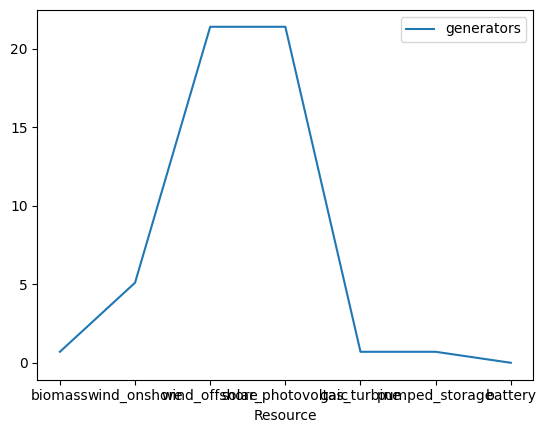

In [82]:
solution = ed_model.solution.to_dataframe()
solution.plot()

##### Multiple-time period, simple generator constraints

We neglected the time dimension above and now we will add it back in. The key changes to the model arise from adding an additional index for time:
   
$$\begin{align}
    \min \ & \sum_{g \in G, t \in T} VarCost_g \times GEN_{g,t} & \\
    \text{s.t.} & \\
     & \sum_{g} GEN_{g,t} = Demand_t & \forall \quad t \in T \  \\
     & GEN_{g,t} \leq Pmax_{g,t} & \forall \quad g \in G , t \in T \\
    & GEN_{g,t} \geq Pmin_{g,t} & \forall \quad g \in G , t \in T
    \end{align}
$$
    
P_min and P_max are constant over time for conventional resources, but  
for variable renewable generators, it is natural that $Pmax_{g,t}$ varies with time (i.e., based on solar irradiation or wind speeds). $Pmin_{g,t}$ for wind and solar resources is usually 0, but for hydropower resources, minimum streamflow constraints can produce a time-variant parameter.

  

### 3. Economic-Emissions Dispatch
**Objective**: as for ED minimizing the short run costs a but also the emitted emissions of the generators -> multi-objective problem; different approaches possible

### 4. Unit Commitment: 
involves scheduling the on/off status and output levels of generating units over a specified time horizon, ensuring that demand is met at the lowest cost while respecting technical constraints of the units.

### 5. Optimal Power Flow (OPF) -> Transport Model: 
straightforward extension to Economic Dispatch (ED). Aims to find the optimal operating conditions for a power system by minimizing a cost function, such as generation cost or power losses, subject to power flow equations and system constraints. The transport model simplifies this by focusing on the flow of power across the network. Multiple supply and demand balance constraints at each location/ "node" in the network  and a new set of flow constraints between nodes are defined. 

### 6. DC-OPF: Linear Approximation of Optimal Power Flow:
a simplified version of the OPF problem that uses linear approximations to model the power system, incorporates (some) physics on how electricity flows along transmission lines: flows along lines are not independently controllable. electrical power flows across transmission lines in relation to their physical properties, namely power flows across parallel circuits or paths in inverse proportion to the electrical impedance of the lines. This can (very frequently) result in hitting flow constraints as for power flows across all lines as in the transport problem.


can include inter-temporal constraints, additional generation constraints (e.g., on voltage), security constraints to ensure stability in the case of contingencies, and network losses.

Useful Links

- https://github.com/Power-Systems-Optimization-Course/power-systems-optimization?tab=readme-ov-file
- https://fneum.github.io/data-science-for-esm/09-workshop-pypsa.html#a-slightly-more-realistic-example

- https://github.com/Pyomo/PyomoGallery/blob/master/maxflow/maxflow.ipynb

